In [1]:
import pandas as pd
import numpy as np

In [2]:
liver_df= pd.read_csv('indian_liver_patient.csv')

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.shape

(583, 11)

In [5]:
liver_df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [6]:
liver_df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [8]:
liver_df['Albumin_and_Globulin_Ratio'].isna().sum()

0

In [9]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
cont_data= liver_df.drop(['Gender'], axis=1)

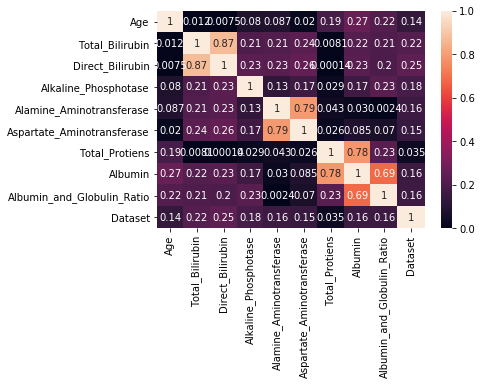

In [12]:
sns.heatmap(cont_data.corr().abs(), annot= True)

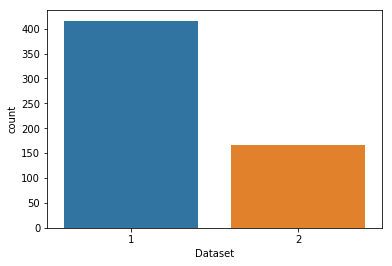

In [13]:
sns.countplot(liver_df['Dataset'])

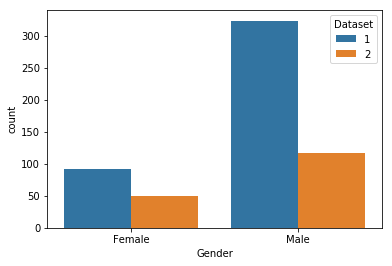

In [15]:
sns.countplot('Gender', hue= 'Dataset', data= liver_df)

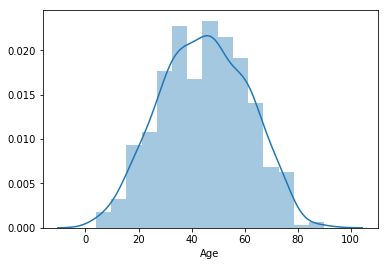

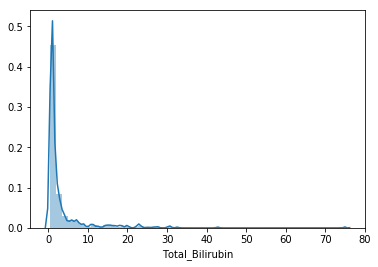

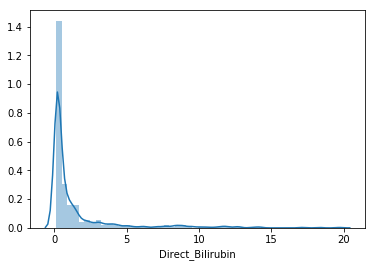

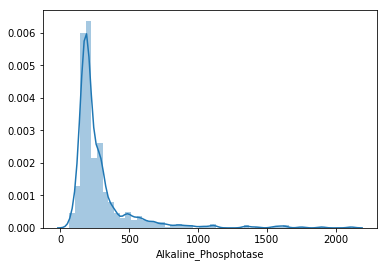

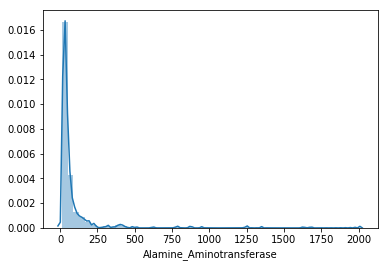

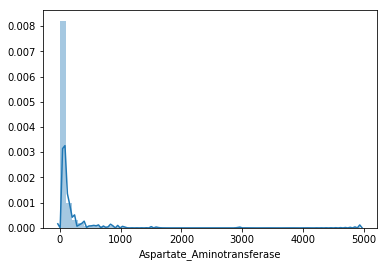

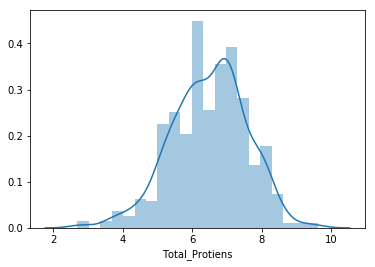

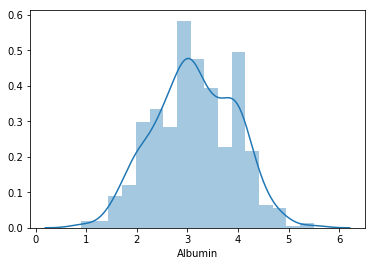

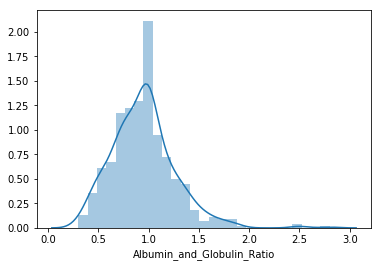

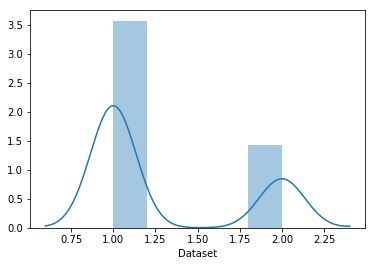

In [18]:
for column in cont_data:
    sns.distplot(liver_df[column])
    plt.show()

In [19]:
liver_df['gender']= pd.get_dummies(liver_df['Gender'], drop_first= True)
liver_df['gender']

0      0
1      1
2      1
3      1
4      1
5      1
6      0
7      0
8      1
9      1
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     1
18     0
19     0
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     0
      ..
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    0
565    1
566    0
567    1
568    0
569    1
570    1
571    1
572    1
573    1
574    1
575    1
576    1
577    1
578    1
579    1
580    1
581    1
582    1
Name: gender, Length: 583, dtype: uint8

In [20]:
#droping 'Direct_Bilirubin'- high correlation with 'Total_Bilirubin'
liver_df.drop(['Gender', 'Direct_Bilirubin'], axis=1, inplace=True)

In [21]:
liver_df.head(10)

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,gender
0,65,0.7,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,195,27,59,7.3,2.4,0.40,1,1
5,46,1.8,208,19,14,7.6,4.4,1.30,1,1
6,26,0.9,154,16,12,7.0,3.5,1.00,1,0
7,29,0.9,202,14,11,6.7,3.6,1.10,1,0
8,17,0.9,202,22,19,7.4,4.1,1.20,2,1
9,55,0.7,290,53,58,6.8,3.4,1.00,1,1


In [22]:
x= liver_df.drop(['Dataset'], axis=1)
y= liver_df['Dataset']

In [23]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
x_std= std.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test= train_test_split(x_std, y, test_size= 0.2, stratify= y, random_state= 73)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [26]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.87      0.80        83
           2       0.45      0.26      0.33        34

   micro avg       0.69      0.69      0.69       117
   macro avg       0.60      0.57      0.57       117
weighted avg       0.66      0.69      0.66       117

[[72 11]
 [25  9]]
0.5660878809355067


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
dc= DecisionTreeClassifier(max_depth=9)
dc.fit(x_train, y_train)
y_pred= dc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.81      0.78        83
           2       0.45      0.38      0.41        34

   micro avg       0.68      0.68      0.68       117
   macro avg       0.60      0.59      0.60       117
weighted avg       0.67      0.68      0.68       117

[[67 16]
 [21 13]]
0.5947909284195606


In [29]:
rf= RandomForestClassifier(n_estimators=275, random_state= 73)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82        83
           2       0.57      0.50      0.53        34

   micro avg       0.74      0.74      0.74       117
   macro avg       0.69      0.67      0.68       117
weighted avg       0.74      0.74      0.74       117

[[70 13]
 [17 17]]
0.6716867469879519


In [32]:
svm= SVC()
svm.fit(x_train, y_train)
y_pred= svm.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        83
           2       0.00      0.00      0.00        34

   micro avg       0.71      0.71      0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117

[[83  0]
 [34  0]]
0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted